#### Problem Statement :
To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features provided.

#### Problem Description
Forecasting is an important approach to take an optimal decision and implement appropriate action plans. A major non-life insurance company wants to evaluate customer life time value based on each customer’s demographics and policy information including claim details. The CLV is a profitability metric in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer`s present Value and potential future Value.

You are expected to create an analytical and modelling framework to predict the life time value of each customer based on the quantitative and qualitative features provided in the dataset and also cluster the train dataset to understand behaviour of each segment.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-life-time-value/test-1574429501088.csv
/kaggle/input/customer-life-time-value/train-1574429526318.csv


In [2]:
#loading data
train_data = pd.read_csv("/kaggle/input/customer-life-time-value/train-1574429526318.csv")
test_data = pd.read_csv("/kaggle/input/customer-life-time-value/test-1574429501088.csv")

### Explotary Data Analysis:

In [3]:
# To get the top 5 records of train
train_data.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [4]:
# To get the top 5 records of test
test_data.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,...,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,...,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,...,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,Medsize


In [5]:
# describe gives the summary statstics of train data
train_data.describe(include ='all')

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
count,9806.000000,9806.000000,8881,9677,9688,9677,9806,9806,9687,9677,...,9806.000000,8988.000000,9685.000000,8915,9685,9678,9678,9806.000000,9680,9680.000000
unique,NaN,NaN,3,5,5,2,4622,2840,3,3,...,NaN,NaN,NaN,3,9,4,4,NaN,6,NaN
top,NaN,NaN,Basic,Bachelor,Employed,F,0,"NA,NA",Suburban,Married,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,NaN
freq,NaN,NaN,5361,2934,6020,4985,2461,119,6204,5643,...,NaN,NaN,NaN,6620,3637,3975,3670,NaN,4869,NaN
mean,5778.381807,7998.047015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.165001,0.379172,2.960351,NaN,NaN,NaN,NaN,438.266734,NaN,2.089773
std,3343.286093,6848.055899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.963630,0.896427,2.389801,NaN,NaN,NaN,NaN,293.502301,NaN,0.538524
min,1.000000,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,1.000000
25%,2879.250000,4013.949039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,280.352767,NaN,2.000000
50%,5783.000000,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,384.007015,NaN,2.000000
75%,8678.750000,8960.280213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.750000,0.000000,4.000000,NaN,NaN,NaN,NaN,553.540973,NaN,2.000000


In [6]:
# To get the dimensions of train data
train_data.shape

(9806, 22)

In [7]:
# To get the dimensions of test data
test_data.shape

(1767, 21)

In [8]:
#removing duplicates from train data
train_data.drop_duplicates(keep='first', inplace=True)
train_data.shape

(9806, 22)

In [9]:
#removing duplicates from test data
test_data.drop_duplicates(keep='first', inplace=True)
test_data.shape

(1767, 21)

In [10]:
##checking the data types, non null count of train data
train_data.dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                            object
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

Income is float but here it is showing in object because there are ? in some rows. let's try to resolve this 

In [11]:
# replacing ? in income column with NaN
train_data['Income'] = train_data['Income'].replace('?', np.NaN) 

In [12]:
train_data['Income']=train_data['Income'].astype('float64') 

In [13]:
##checking the data types of train data
train_data.dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

In [14]:
#checking the data typesof test data
test_data.dtypes

CustomerID                         int64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                      object
dtype: object

In [15]:
#checking any unique values are there in train data
train_data.nunique()

CustomerID                       9806
Customer.Lifetime.Value          6477
Coverage                            3
Education                           5
EmploymentStatus                    5
Gender                              2
Income                           4621
Location.Geo                     2840
Location.Code                       3
Marital.Status                      3
Monthly.Premium.Auto              191
Months.Since.Last.Claim            36
Months.Since.Policy.Inception     100
Number.of.Open.Complaints           6
Number.of.Policies                  9
Policy.Type                         3
Policy                              9
Renew.Offer.Type                    4
Sales.Channel                       4
Total.Claim.Amount               4125
Vehicle.Class                       6
Vehicle.Size                        3
dtype: int64

In [16]:
#checking sum of null values from train data
train_data.isnull().sum()

CustomerID                         0
Customer.Lifetime.Value            0
Coverage                         925
Education                        129
EmploymentStatus                 118
Gender                           129
Income                           118
Location.Geo                       0
Location.Code                    119
Marital.Status                   129
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Policy.Type                      891
Policy                           121
Renew.Offer.Type                 128
Sales.Channel                    128
Total.Claim.Amount                 0
Vehicle.Class                    126
Vehicle.Size                     126
dtype: int64

In [17]:
#checking sum of null values from test data
test_data.isnull().sum()

CustomerID                         0
Coverage                           0
Education                          0
EmploymentStatus                   0
Gender                             0
Income                           239
Location.Geo                       0
Location.Code                      0
Marital.Status                     0
Monthly.Premium.Auto              72
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints          0
Number.of.Policies                 0
Policy.Type                       42
Policy                             0
Renew.Offer.Type                   0
Sales.Channel                      0
Total.Claim.Amount                 0
Vehicle.Class                      0
Vehicle.Size                       0
dtype: int64

In [18]:
cols = train_data.columns
cols

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

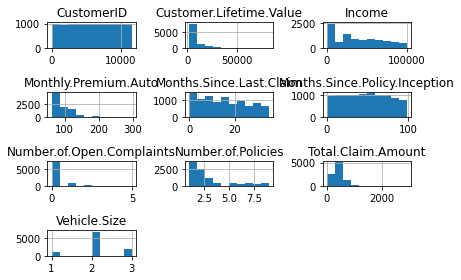

<Figure size 2160x2160 with 0 Axes>

In [19]:
_ =train_data.hist()
plt.tight_layout()
plt.figure(figsize=(30,30))
plt.show()

In [20]:
#checking value counts present in each column
for i in train_data.columns:
    print(i)
    print(train_data[i].value_counts(normalize=True)*100)
    print(f"unique values of {i}-------->{len(train_data[i].unique())}")
    print("<------------------------------->")

CustomerID
5917     0.010198
2315     0.010198
8440     0.010198
7806     0.010198
11064    0.010198
           ...   
3034     0.010198
2637     0.010198
9334     0.010198
8102     0.010198
11323    0.010198
Name: CustomerID, Length: 9806, dtype: float64
unique values of CustomerID-------->9806
<------------------------------->
Customer.Lifetime.Value
6689.022728     0.132572
10656.881950    0.112176
10208.927610    0.101978
6521.368813     0.101978
7285.030983     0.101978
                  ...   
15083.784980    0.010198
9082.833891     0.010198
6245.443568     0.010198
8556.418397     0.010198
8583.272854     0.010198
Name: Customer.Lifetime.Value, Length: 6477, dtype: float64
unique values of Customer.Lifetime.Value-------->6477
<------------------------------->
Coverage
Basic       60.364824
Extended    30.368202
Premium      9.266974
Name: Coverage, dtype: float64
unique values of Coverage-------->4
<------------------------------->
Education
Bachelor                30.319314
Co

In [21]:
df_cat1 = train_data.select_dtypes(include = ['object'])

<div class="alert alert-block alert-info"><b> 
  Pie - charts
</b></div> 

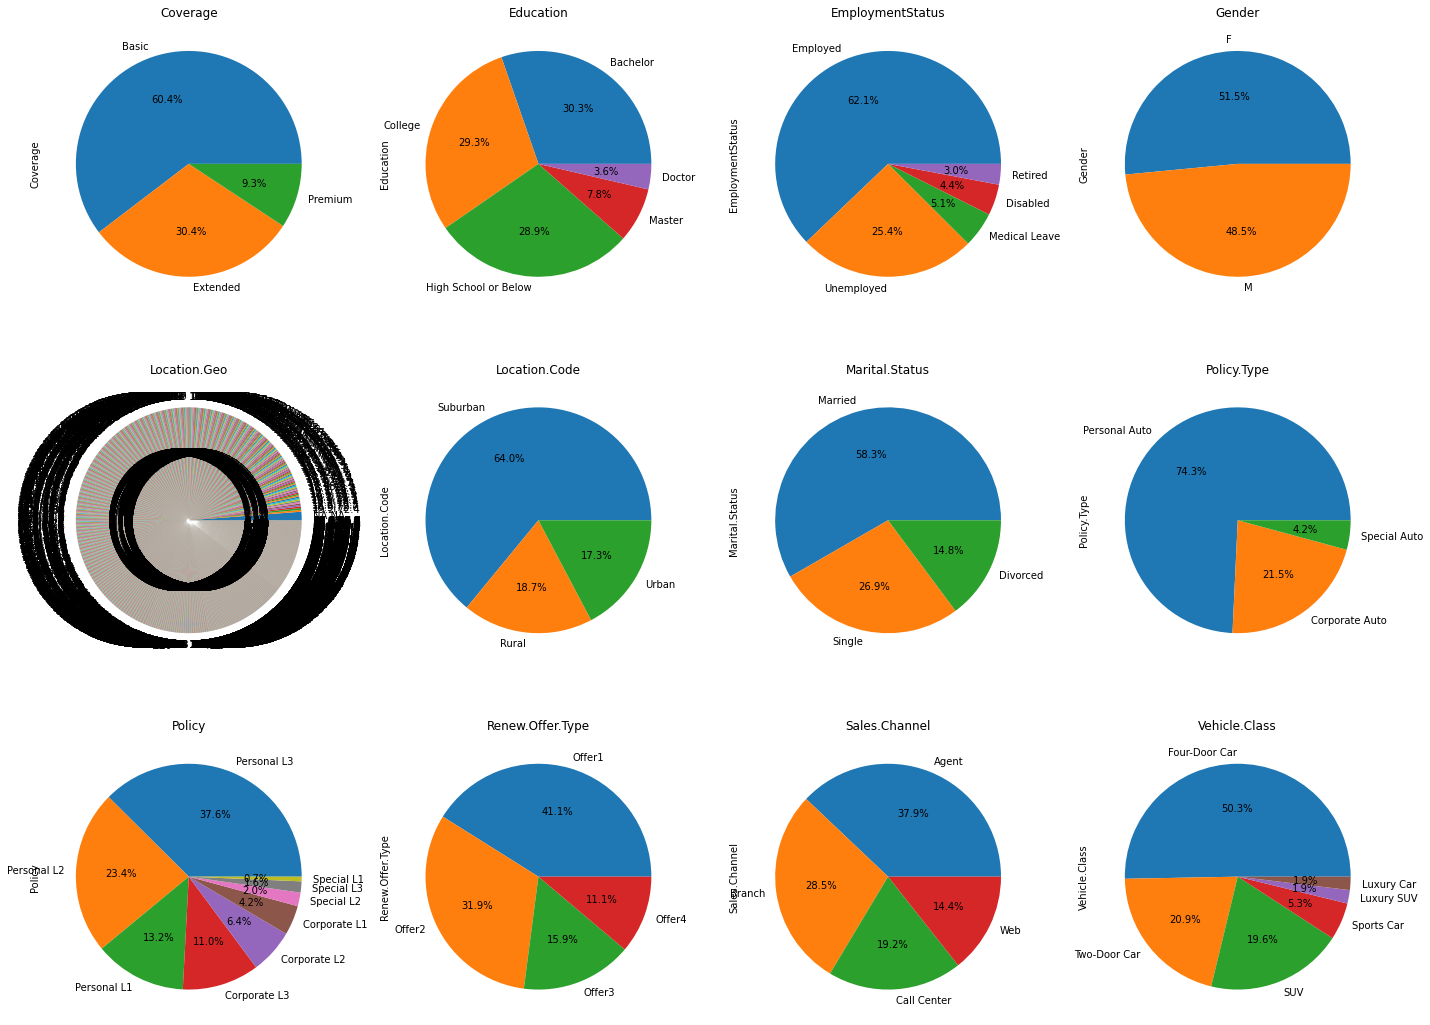

In [22]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        train_data[df_cat1.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(df_cat1.columns[i])

fig.tight_layout()

The pie charts show the percentage of customers in each category of the categorical variables

<div class="alert alert-block alert-info"><b> 
  Bar plots
</b></div> 

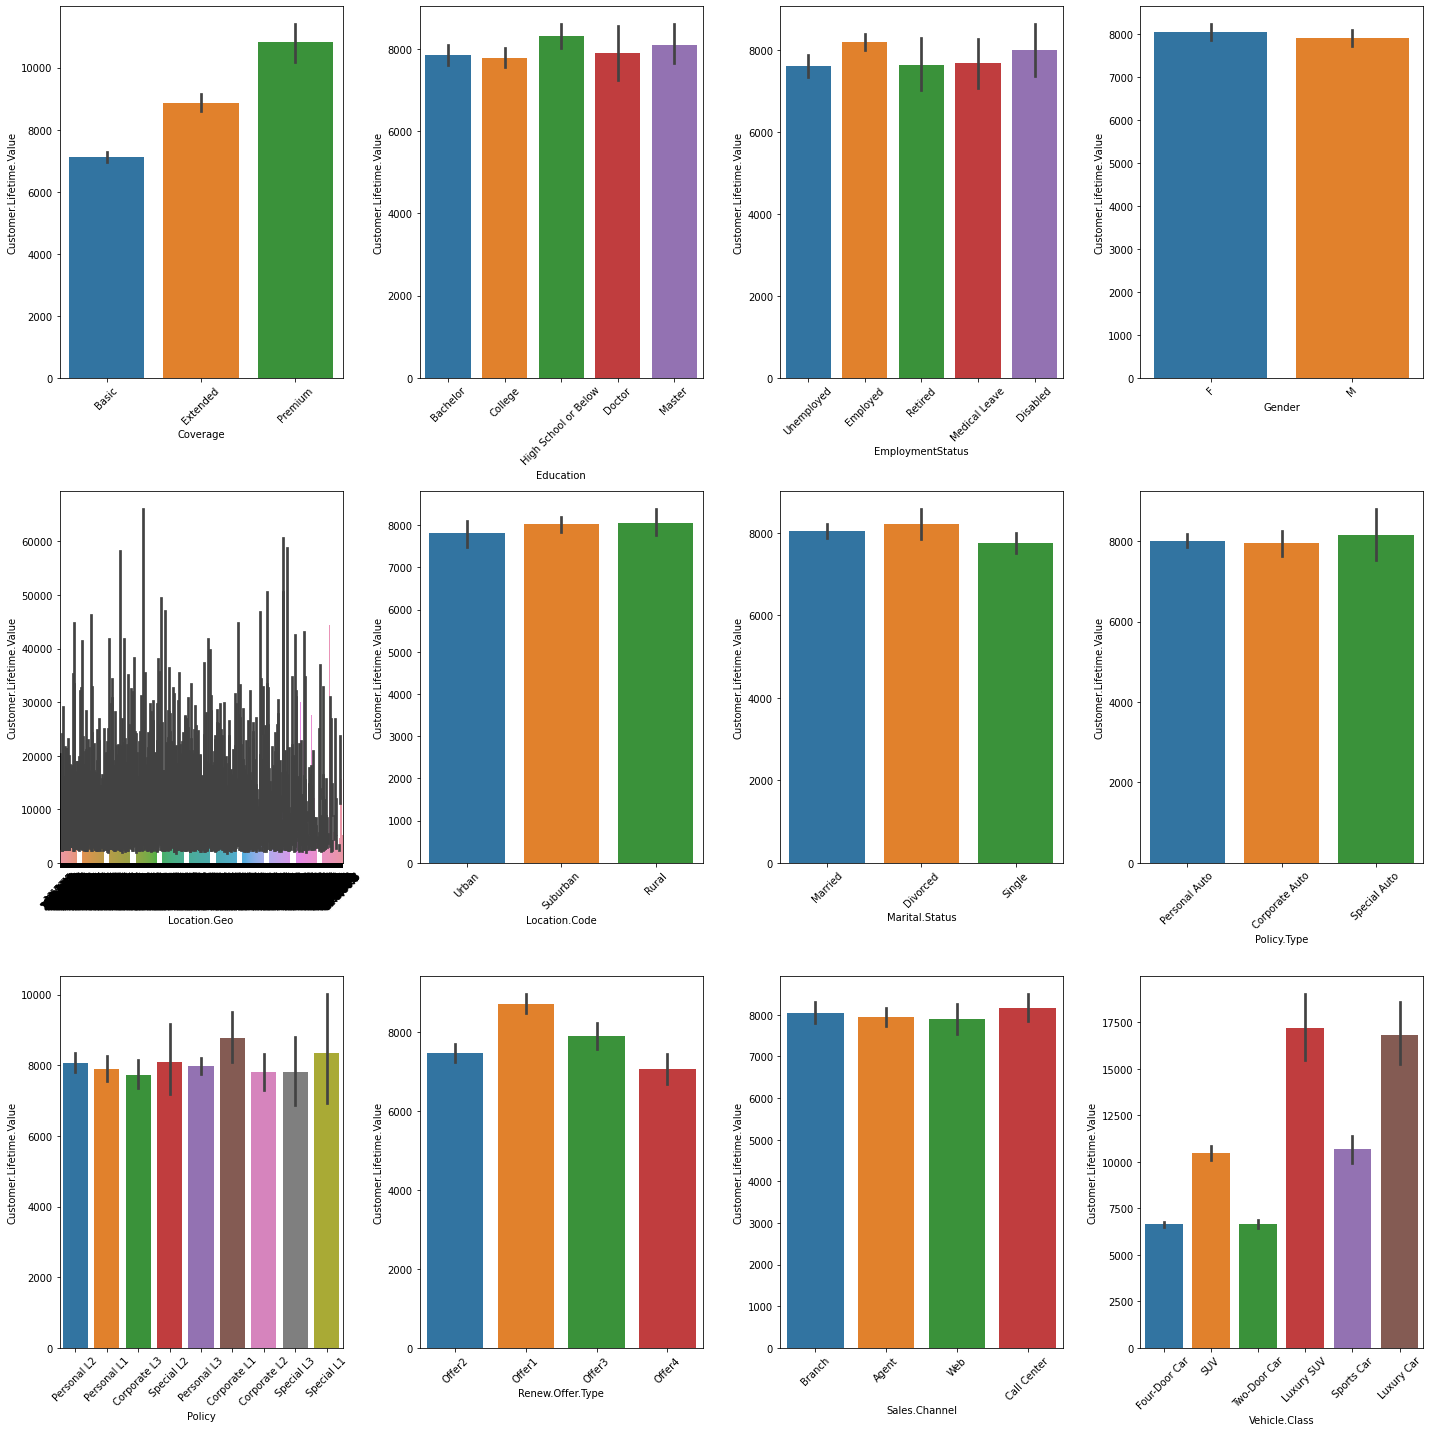

In [23]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        sns.barplot(x = train_data[df_cat1.columns[i]],y = train_data['Customer.Lifetime.Value'],data = train_data, ax = ax )
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

The Bar charts show the average customer life time value of customers in each category of the categorical variables

<div class="alert alert-block alert-info"><b> 
  Histograms-KDE
</b></div> 

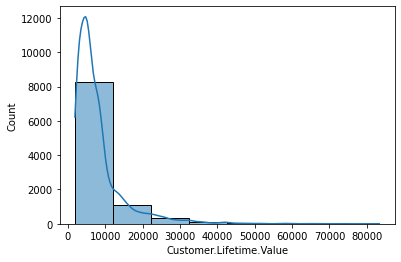

In [24]:
sns.histplot(train_data["Customer.Lifetime.Value"],kde=True,bins=8)
plt.show()

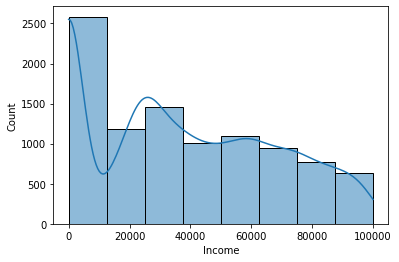

In [25]:
sns.histplot(train_data['Income'],kde=True,bins=8)
plt.show()

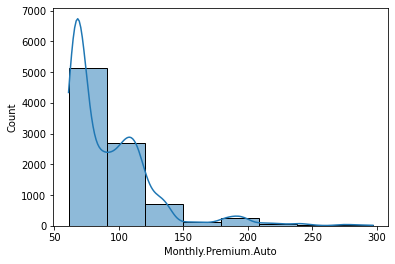

In [26]:
sns.histplot(train_data['Monthly.Premium.Auto'],kde=True,bins=8)
plt.show()

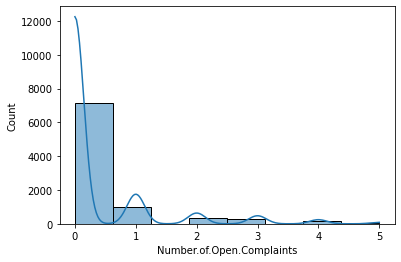

In [27]:
sns.histplot(train_data['Number.of.Open.Complaints'],kde=True,bins=8)
plt.show()

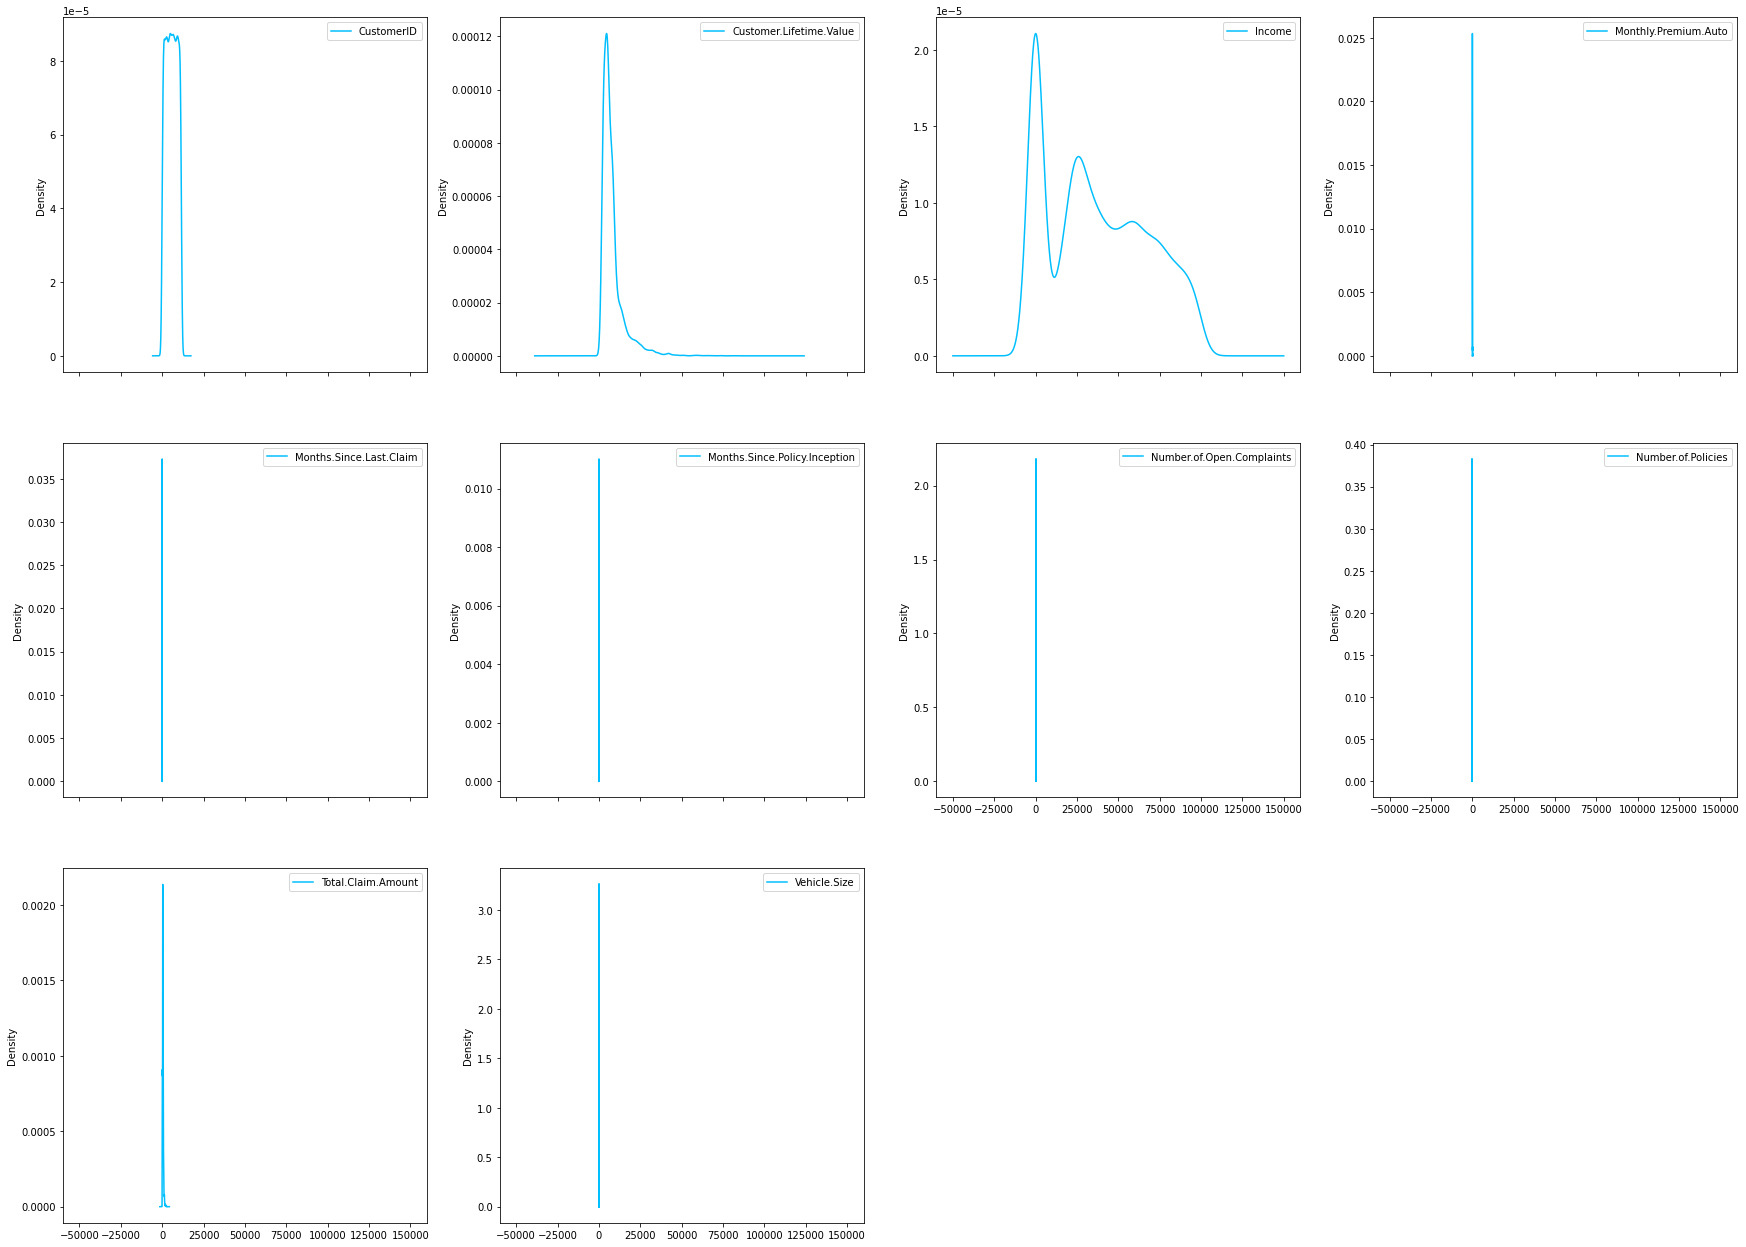

In [28]:
train_data.plot.kde(subplots = True, figsize = (30, 30),
                       layout = (4,4), color = "deepskyblue");

<div class="alert alert-block alert-info"><b> 
  Correlation between Independent features and Dependent Features
</b></div> 

In [29]:
df_num_corr = train_data.corr()['Customer.Lifetime.Value'].sort_values(ascending=False)
df_num_corr

Customer.Lifetime.Value          1.000000
Monthly.Premium.Auto             0.400453
Total.Claim.Amount               0.221572
Income                           0.022937
Number.of.Policies               0.022227
Vehicle.Size                     0.019749
Months.Since.Policy.Inception    0.011508
Months.Since.Last.Claim          0.007151
CustomerID                      -0.008037
Number.of.Open.Complaints       -0.042008
Name: Customer.Lifetime.Value, dtype: float64

<div class="alert alert-block alert-info"><b> 
 Heat map
</b></div> 

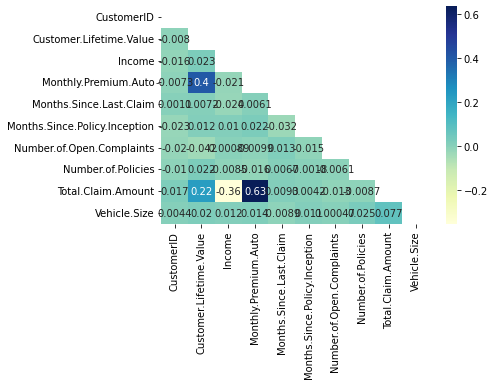

In [30]:
# creating mask
mask = np.triu(np.ones_like(train_data.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

1-None of the features are strongly correlated with the target variable (Customer Life time Value).

2.The highest correlation can be seen between two independent variables - Monthly premium auto and total claim amount, which is equal to 0.63.

In [31]:
test_data1 = test_data.copy()

In [32]:
xtr = train_data.drop(["CustomerID","Location.Geo"],axis=1)
xte = test_data.drop(["CustomerID","Location.Geo"],axis=1)

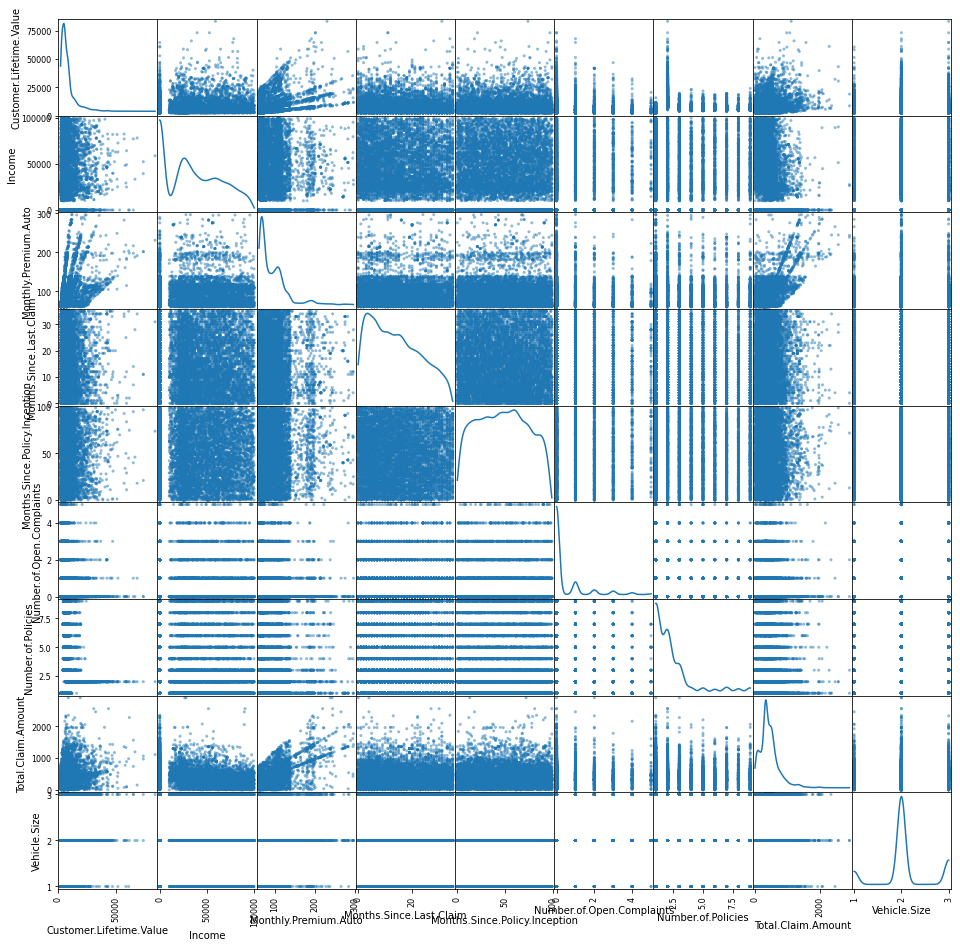

In [33]:
# Scatterplot to check the relation between each pair of numerical columns
pd.plotting.scatter_matrix(xtr, figsize=(16, 16), diagonal='kde')
plt.show()

In [34]:
ytr = train_data[["Customer.Lifetime.Value"]]

In [35]:
#vehicle size in train data is in float and vehicle size test data is in object
xtr["Vehicle.Size"].value_counts()

2.0    6795
3.0    1877
1.0    1008
Name: Vehicle.Size, dtype: int64

In [36]:
xte["Vehicle.Size"].value_counts()

Medsize    1252
Small       343
Large       172
Name: Vehicle.Size, dtype: int64

In [37]:
xte = xte.replace({'Vehicle.Size': {"Large" : 1.0, "Medsize" : 2.0, "Small" : 3.0}})
xte["Vehicle.Size"].value_counts()

2.0    1252
3.0     343
1.0     172
Name: Vehicle.Size, dtype: int64

In [38]:
xtr = train_data.drop(["Customer.Lifetime.Value","CustomerID","Location.Geo"],axis=1)

In [39]:
cat_cols = [col for col in xtr.columns if xtr.dtypes[col]=="object"]
cat_cols

['Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location.Code',
 'Marital.Status',
 'Policy.Type',
 'Policy',
 'Renew.Offer.Type',
 'Sales.Channel',
 'Vehicle.Class']

In [40]:
num_cols = [col for col in xtr.columns if xtr.dtypes[col] !="object"]
num_cols

['Income',
 'Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Vehicle.Size']

In [41]:
xtr_cat = xtr[cat_cols]
xtr_num = xtr[num_cols]
xte_cat = xte[cat_cols]
xte_num = xte[num_cols]

### Null value imputation

In [42]:
from sklearn.impute import SimpleImputer
cat_impu=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
num_impu=SimpleImputer(missing_values=np.nan,strategy ="median")
xtr_cat=pd.DataFrame(cat_impu.fit_transform(xtr_cat),columns=cat_cols)
xtr_num=pd.DataFrame(num_impu.fit_transform(xtr_num),columns=num_cols)
xte_cat=pd.DataFrame(cat_impu.fit_transform(xte_cat),columns=cat_cols)
xte_num=pd.DataFrame(num_impu.fit_transform(xte_num),columns=num_cols)


In [43]:
# Function to convert all object columns to categorical
xtr_cat[cat_cols]=xtr_cat[cat_cols].astype("category")
xte_cat[cat_cols]=xte_cat[cat_cols].astype("category")

<div class="alert alert-block alert-info"><b> 
  Dummifing categorical features into numerical using Label encoder
</b></div> 

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [45]:
for col in cat_cols:
    xtr_cat[col]=encoder.fit_transform(xtr_cat[col])
    xte_cat[col]=encoder.fit_transform(xte_cat[col])

In [46]:
xtr_cat.head()

,Coverage,Education,EmploymentStatus,Gender,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,0,0,4,0,2,1,1,4,1,1,0
1,0,1,1,1,1,1,1,4,1,0,3
2,0,3,1,0,2,1,1,3,1,1,3
3,0,1,1,1,1,1,0,2,0,1,3
4,0,0,3,0,1,1,1,3,1,3,5


In [47]:
train_data.shape

(9806, 22)

<div class="alert alert-block alert-info"><b> 
  concat the dummfiying values,scaling values
</b></div> 

In [48]:
xtr=pd.concat([xtr_num,xtr_cat],axis=1)

In [49]:
xte=pd.concat([xte_num,xte_cat],axis=1)

In [50]:
columnsxtr = xtr.columns
columnsxtr 

Index(['Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount', 'Vehicle.Size', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class'],
      dtype='object')

In [51]:
columnsxte = xte.columns
columnsxte

Index(['Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount', 'Vehicle.Size', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class'],
      dtype='object')

<div class="alert alert-block alert-info"><b> 
  scaling the data using normalization
</b></div> 

In [52]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(xtr)

MinMaxScaler()

In [53]:
xtr = pd.DataFrame(scale.transform(xtr),columns=columnsxtr)

In [54]:
xtr.isnull().sum()

Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Location.Code                    0
Marital.Status                   0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Vehicle.Class                    0
dtype: int64

In [55]:
xte.isnull().sum()

Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Location.Code                    0
Marital.Status                   0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Vehicle.Class                    0
dtype: int64

In [56]:
xte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         1767 non-null   float64
 1   Monthly.Premium.Auto           1767 non-null   float64
 2   Months.Since.Last.Claim        1767 non-null   float64
 3   Months.Since.Policy.Inception  1767 non-null   float64
 4   Number.of.Open.Complaints      1767 non-null   float64
 5   Number.of.Policies             1767 non-null   float64
 6   Total.Claim.Amount             1767 non-null   float64
 7   Vehicle.Size                   1767 non-null   float64
 8   Coverage                       1767 non-null   int64  
 9   Education                      1767 non-null   int64  
 10  EmploymentStatus               1767 non-null   int64  
 11  Gender                         1767 non-null   int64  
 12  Location.Code                  1767 non-null   i

In [57]:
xte = pd.DataFrame(scale.transform(xte),columns=columnsxte)

In [58]:
xte.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,Coverage,Education,EmploymentStatus,Gender,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,0.438443,0.050847,0.342857,0.444444,0.0,0.000,0.047710,0.5,0.0,0.00,0.25,1.0,0.0,1.0,0.5,0.375,0.000000,0.000000,0.0
1,0.288175,0.135593,0.485714,0.070707,0.0,0.875,0.147047,0.5,0.5,0.25,0.25,0.0,1.0,0.5,1.0,0.875,0.333333,0.333333,0.0
2,0.770406,0.207627,0.257143,0.828283,0.4,0.250,0.163121,0.5,1.0,1.00,0.25,1.0,1.0,0.5,0.0,0.000,0.333333,0.000000,0.0
3,0.246037,0.012712,0.342857,0.505051,0.2,0.125,0.014801,0.5,0.0,0.00,0.25,0.0,0.0,0.5,0.0,0.125,0.333333,0.333333,0.0
4,0.137916,0.076271,0.228571,0.494949,0.0,0.000,0.131034,0.5,0.5,0.00,0.00,0.0,0.5,0.0,0.5,0.625,1.000000,0.666667,0.0


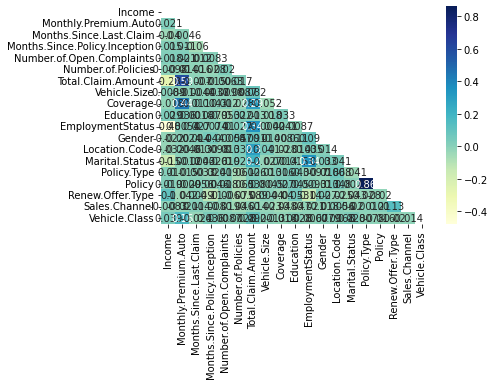

<Figure size 1008x576 with 0 Axes>

In [59]:
mask = np.triu(np.ones_like(xte.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(xte.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.figure(figsize=(14,8))
# displaying heatmap
plt.show()

for Income


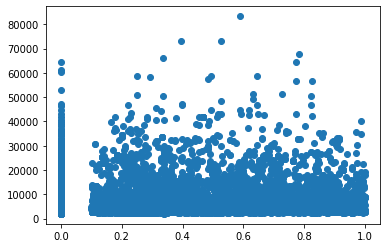

for Monthly.Premium.Auto


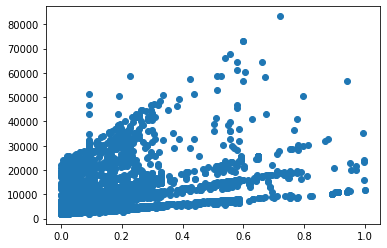

for Months.Since.Last.Claim


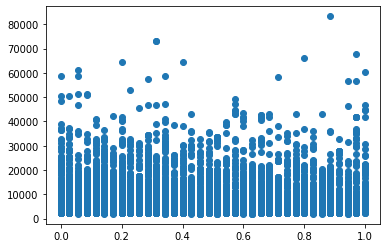

for Months.Since.Policy.Inception


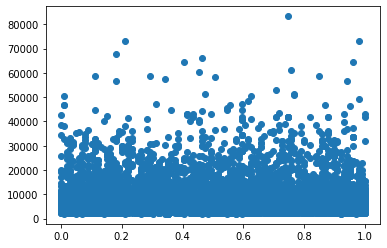

for Number.of.Open.Complaints


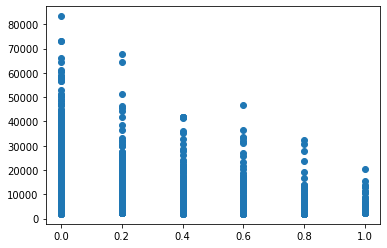

for Number.of.Policies


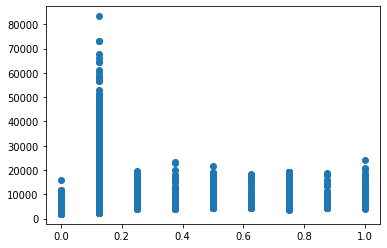

for Total.Claim.Amount


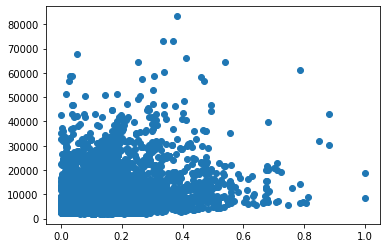

for Vehicle.Size


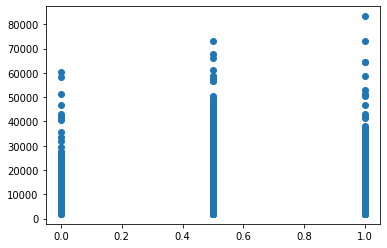

for Coverage


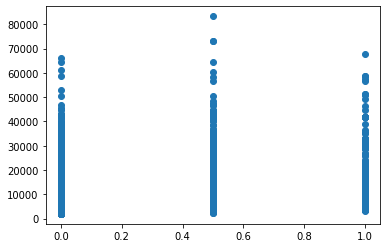

for Education


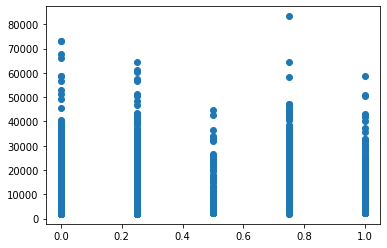

for EmploymentStatus


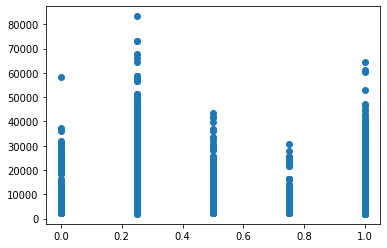

for Gender


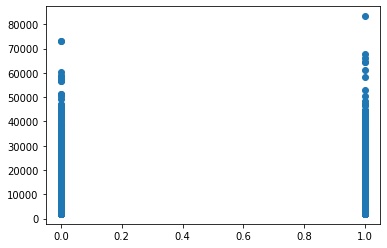

for Location.Code


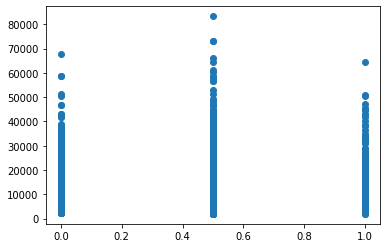

for Marital.Status


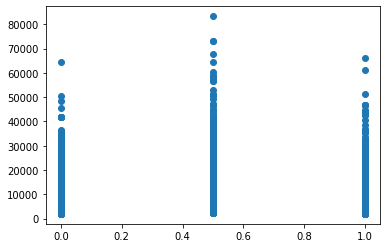

for Policy.Type


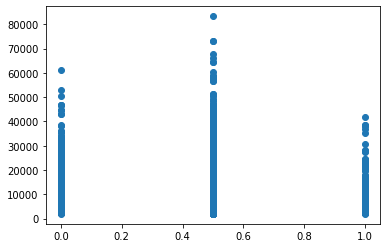

for Policy


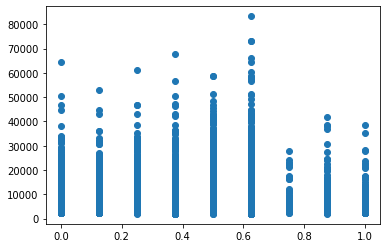

for Renew.Offer.Type


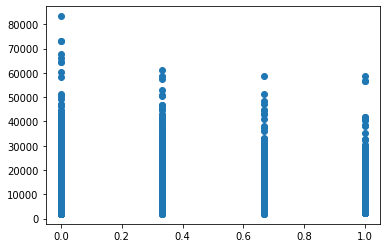

for Sales.Channel


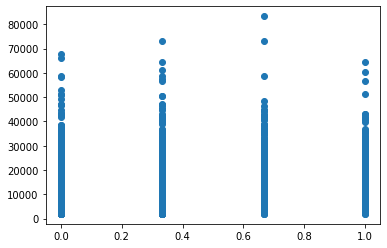

for Vehicle.Class


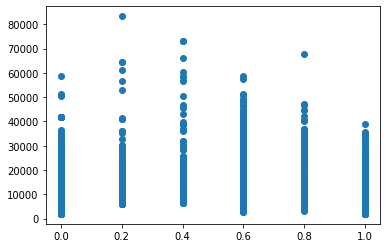

In [60]:
import matplotlib.pyplot as plt
for col in xtr.columns:
    print("for",col)
    plt.scatter(xtr[col],ytr)
    plt.show()

<div class="alert alert-block alert-info"><b> 
  Splitting our data
</b></div> 

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xtr,ytr,test_size=0.25,random_state=142)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7354, 19)
(2452, 19)
(7354, 1)
(2452, 1)


### Model Building

<div class="alert alert-block alert-info"><b> 
  Linear Regression
</b></div> 

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
train_pred=reg.predict(x_train)
test_pred = reg.predict(x_test)
print('RMSE LinearRegression on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('RMSE LinearRegression on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

RMSE LinearRegression on train :  6276.785352039797
RMSE LinearRegression on test :  6306.356508999642


<div class="alert alert-block alert-info"><b> 
  Ridge Regression
</b></div> 

In [63]:
from sklearn.linear_model import Ridge, Lasso
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)

train_pred=ridgeReg.predict(x_train)
test_pred = ridgeReg.predict(x_test)
print('Ridge Regression on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('Ridge Regression on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

Ridge Regression on train :  6280.141212501634
Ridge Regression on test :  6306.505798597021


<div class="alert alert-block alert-info"><b> 
  Lasso Regression
</b></div> 

In [64]:
#Lasso regression model
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_pred=lasso.predict(x_train)
test_pred = lasso.predict(x_test)
print('lasso Regression on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('lasso Regression on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

lasso Regression on train :  6279.063916423384
lasso Regression on test :  6305.097604418807


<div class="alert alert-block alert-info"><b> 
  Random Forest Regressor
</b></div> 

In [65]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(random_state=3,max_depth=9,min_samples_leaf=3)
model_RFR.fit(x_train, y_train.values.ravel())
train_pred=model_RFR.predict(x_train)
test_pred = model_RFR.predict(x_test)
print('RMSE RandomForestRegressor on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('RMSE RandomForestRegressor on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

RMSE RandomForestRegressor on train :  3190.291652414883
RMSE RandomForestRegressor on test :  3922.0365102507767


In [66]:
#RandomSearchCV designed to find the best parameters to improve our model
from sklearn.model_selection import RandomizedSearchCV
rf_grid = RandomForestRegressor(random_state=4)
rf_param_grid = {"n_estimators" : [2,4,6,8,10,12,14,16,20,25],
                 "max_depth" : [5,7,9,11,13,15],
                 "min_samples_leaf" : [2,3,5,7,10]}
rf2=RandomizedSearchCV(rf_grid,rf_param_grid,cv=10,n_jobs=-1,n_iter=3000)
rf2.fit(x_train,y_train.values.ravel())
train_pred=rf2.predict(x_train)
test_pred = rf2.predict(x_test)
print('RMSE RandomizedSearchCV on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('RMSE RandomizedSearchCV on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

RMSE RandomizedSearchCV on train :  3088.210169157668
RMSE RandomizedSearchCV on test :  3941.3918776155765


# Conclusion

<div class="alert alert-block alert-info"><b> 
   Tuned Random forest regressor gave the best results as compared to all the other algorithms we tried.
</b></div> 

# Lets work on test data

### Predictions

In [67]:
Target = pd.DataFrame(rf2.predict(xte),columns=['Customer.Lifetime.Value'])

In [68]:
CustomerID=pd.DataFrame(test_data1.CustomerID)

In [69]:
pred=pd.concat([CustomerID,Target],axis=1)

In [70]:
pred.head()

,CustomerID,Customer.Lifetime.Value
0,17,2866.182533
1,19,7235.071578
2,29,8702.522588
3,34,10084.121099
4,37,3040.721646


In [71]:
pred.to_csv('Submission1rf22.csv',index=False)

# clustering

In [72]:
col=["Income"]

In [73]:
impu=SimpleImputer(missing_values=np.nan,strategy ="median")
train_data[["Income"]]=pd.DataFrame(impu.fit_transform(train_data[["Income"]]),columns=col)

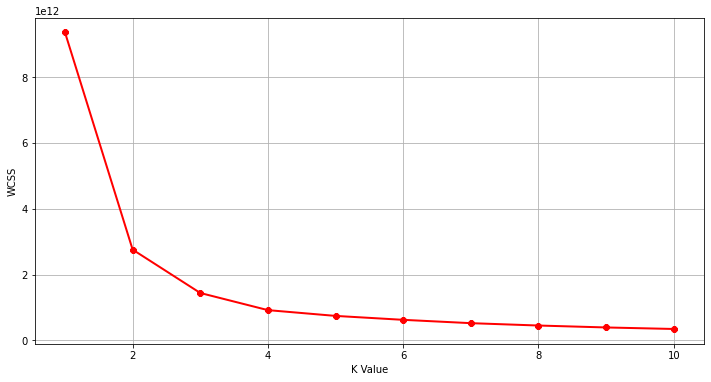

In [74]:
X1= train_data[['Income','Customer.Lifetime.Value']].iloc[: , :].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =( 12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

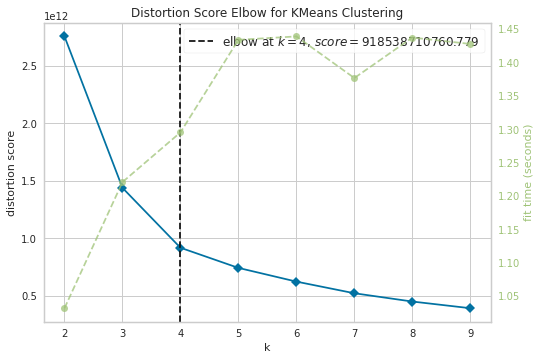

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(X1)        # Fit data to visualizer
visualizer.show()

In [76]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[2 3 3 ... 1 1 0]


In [77]:
print(kmeans.cluster_centers_)

[[28745.35836066  8041.45009682]
 [83549.47980078  8022.45305279]
 [ 1177.36929308  7654.75663866]
 [56223.32019704  8336.55823265]]


<function matplotlib.pyplot.show(close=None, block=None)>

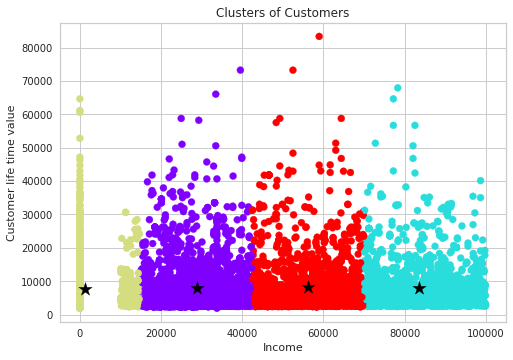

In [78]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',s=200,marker='*')
plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('Customer life time value')
plt.show

<div class="alert alert-block alert-info"><b> 
 **Conclusion:**

-For large number of data K-Means Clustering is always good.
    
-It's easy to find the optimal no of clusters in K-Means because of elbow method. 
    
 (we can't find the optimal no of clusters accuratley by using dendogram for large number of data. hence, for large number of data Hierarchical clustering is not possible)
     </b></div>